### **Cotton Disease Prediction**

In this notebook, we are going to do  Cotton disease prediction using CNN. So, we have transfer techniques framework in CNN  such as Alexnet, Resnet-50, ResNet101, Resnet150,VGG-16,VGG-19, Inceptionv1,InceptionV2, Inceptionv3 and Inception-Resnet-v2 But In this notebook I will use VGG-16,VGG-19,Inception-V3 and Inception-Resnet-v2. Finally, we are going to check the accuracy of each model.

### **Setup the Tensorflow**

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORTING REQUIRED LIBRARIES
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from keras.optimizers import Adam
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image

In [4]:
Image_size = [224,224]
valid_path = "/content/drive/MyDrive/cotton desise classification/test"
train_path = "/content/drive/MyDrive/cotton desise classification/train"

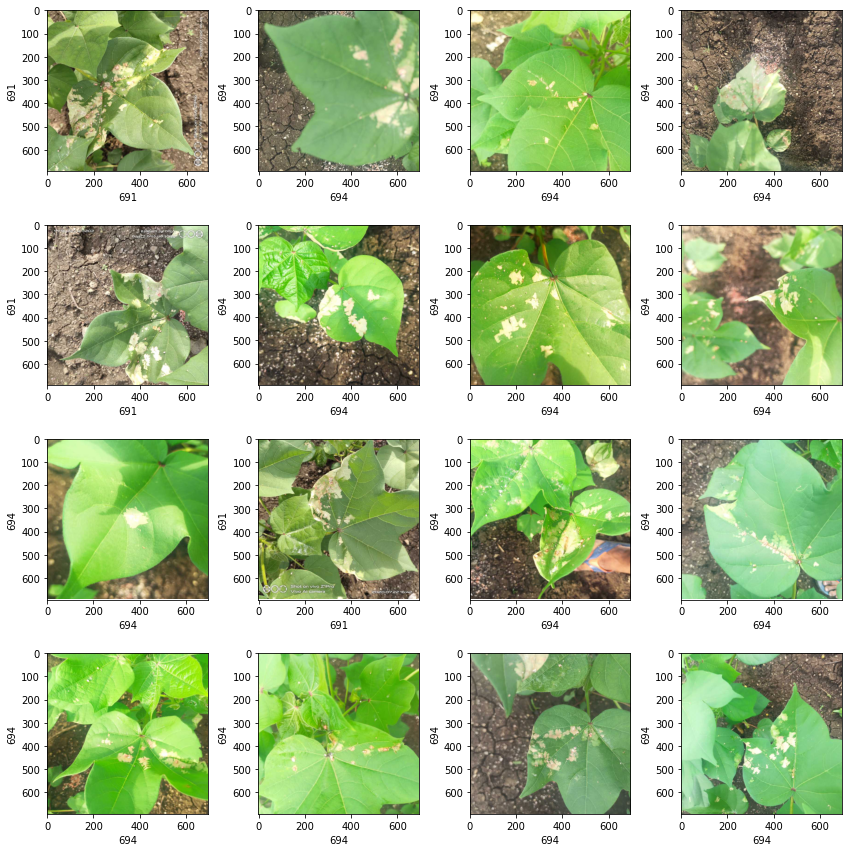

In [5]:
# Plotting 16 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/cotton desise classification/train/diseased cotton leaf"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

By Visualizing the image, we could see each image has same dimension So, we don't need to do the change the shape of the images.

### Checking the Number of the Classes in the dataset

In [51]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/cotton desise classification/train/*")
print("The number of classes in the train dataset is "+" "+str(len(folders)))

The number of classes in the train dataset is  4


### **Applying InceptionV3**

In [13]:
from google.colab import files
uploaded = files.upload()

Saving inception.jpg to inception (1).jpg


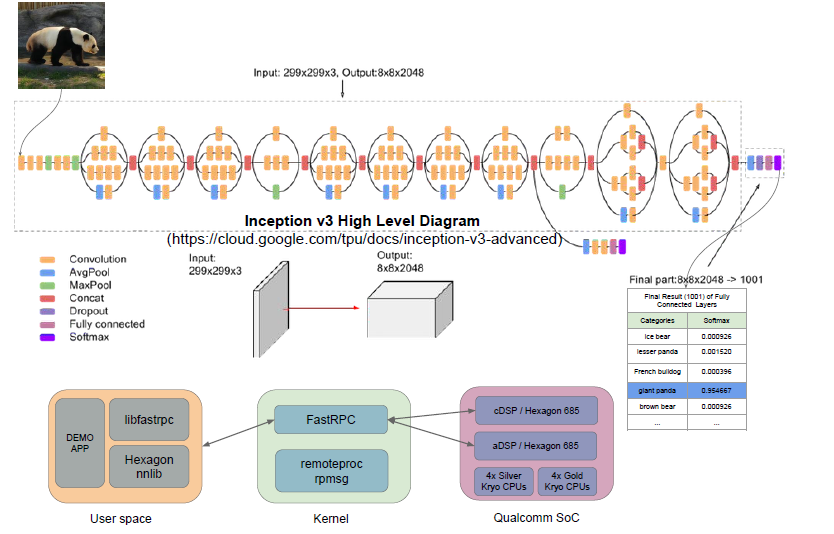

In [14]:
from IPython.display import Image
Image('inception.jpg',width=800)

In [97]:
from keras.applications.inception_v3 import InceptionV3

In [112]:
#creating the inception layer
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=Image_size+[3])

In [113]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [114]:
#flatten the output of inception model
x_v3 = Flatten()(inception.output)

In [116]:
prediction_v3 = Dense(len(folders),activation='softmax')(x_v3)

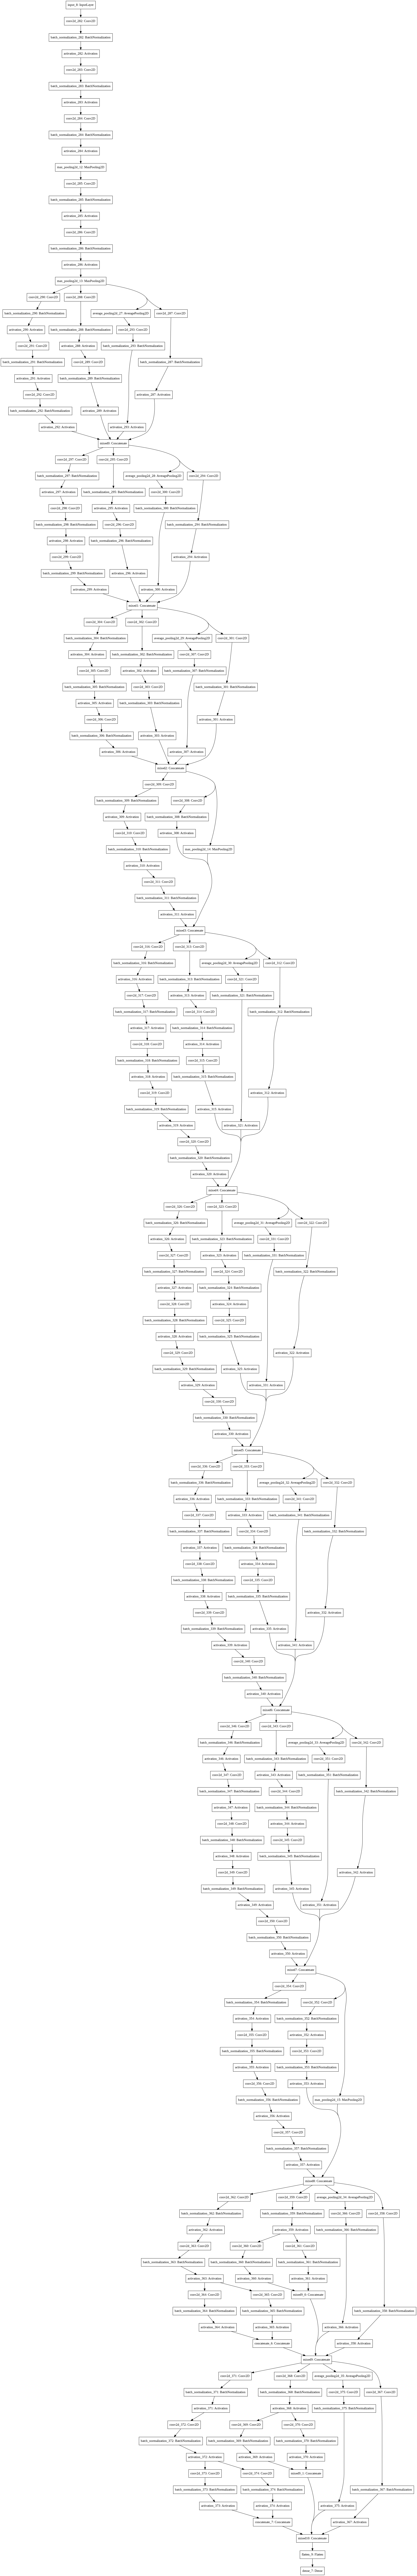

In [117]:
#create model
model_v3 = Model(inputs=inception.input,outputs = prediction_v3)
plot_model(model_v3)

In [118]:
model_v3.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [119]:
model_v3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### **Train and Test Data Augmentation**

In [120]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [121]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton desise classification/train',
                                  
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton desise classification/test',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


Found 1822 images belonging to 4 classes.
Found 122 images belonging to 4 classes.


In [122]:
history= model_v3.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/25
114/114 [==============================] - 57s 357ms/step - loss: 3.0563 - accuracy: 0.6463 - val_loss: 239.3774 - val_accuracy: 0.1311
Epoch 2/25
114/114 [==============================] - 34s 300ms/step - loss: 1.4670 - accuracy: 0.6240 - val_loss: 13.2923 - val_accuracy: 0.6066
Epoch 3/25
114/114 [==============================] - 35s 304ms/step - loss: 0.8049 - accuracy: 0.7514 - val_loss: 6.9790 - val_accuracy: 0.5820
Epoch 4/25
114/114 [==============================] - 34s 302ms/step - loss: 0.8665 - accuracy: 0.7524 - val_loss: 3.8664 - val_accuracy: 0.7213
Epoch 5/25
114/114 [==============================] - 35s 305ms/step - loss: 0.5736 - accuracy: 0.8068 - val_loss: 49.6227 - val_accuracy: 0.6066
Epoch 6/25
114/114 [==============================] - 34s 301ms/step - loss: 0.7688 - accuracy: 0.7972 - val_loss: 200.3492 - val_accuracy: 0.6721
Epoch 7/25
114/114 [==============================] - 35s 304ms/step - loss: 0.5226 - accuracy: 0.8403 - val_loss: 136.8660 

### Model Evaluation

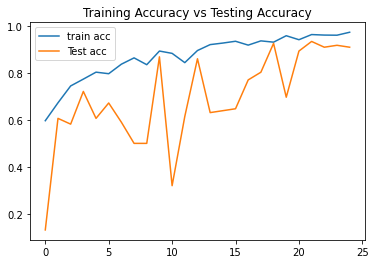

<Figure size 432x288 with 0 Axes>

In [123]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='Test acc')
plt.title("Training Accuracy vs Testing Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

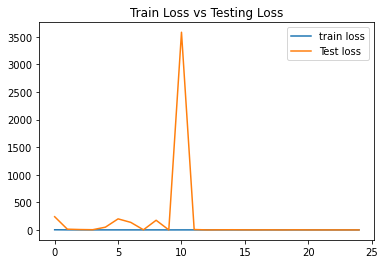

<Figure size 432x288 with 0 Axes>

In [124]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title("Train Loss vs Testing Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

By visualizing the train and test error as well as accuracy. It is pretty good because it gave 93% accuracy for the training dataset also 92% accuracy for the test dataset..

### **Prediction**

In [28]:
y_pred = model.predict(test_set)

y_pred

y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 0, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 3, 0, 0, 3, 1, 3, 1, 2, 3, 1, 3, 3, 3, 0, 3, 1, 3, 3, 3, 1,
       1, 3, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 0, 2, 3, 3, 1, 0, 3, 1, 1,
       1, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 1, 0, 3, 0, 1, 1, 3, 1, 0, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3])

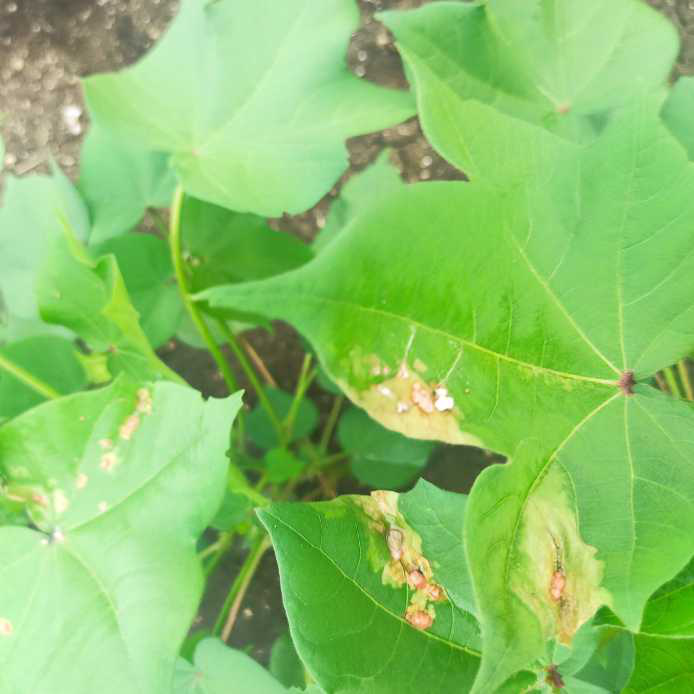

In [30]:

#show image
from PIL import Image
from IPython.display import display # to display images

img = Image.open('/content/drive/MyDrive/cotton desise classification/test/diseased cotton leaf/dis_leaf (12)_iaip.jpg')
display(img)

In [31]:

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
path='/content/drive/MyDrive/cotton desise classification/test/diseased cotton leaf/dis_leaf (12)_iaip.jpg'
img=image.load_img(path,target_size=(224,224))

x=image.img_to_array(img)

x =x /255

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

preds = model.predict(x)
preds=np.argmax(preds, axis=1)
#print(preds)
if preds==0:
  print("It is diseased cotton leaf")
elif preds==1:
  print("It is diseased cotton plant")
elif preds==2:
  print("It is fresh cotton leaf")
elif preds==3:
  print("It is fresh cotton plant")
else:
  None

It is fresh cotton plant


### **Transfer Learning VGG-16**

In [108]:
from google.colab import files
uploaded = files.upload()

Saving VGG-16.png to VGG-16.png


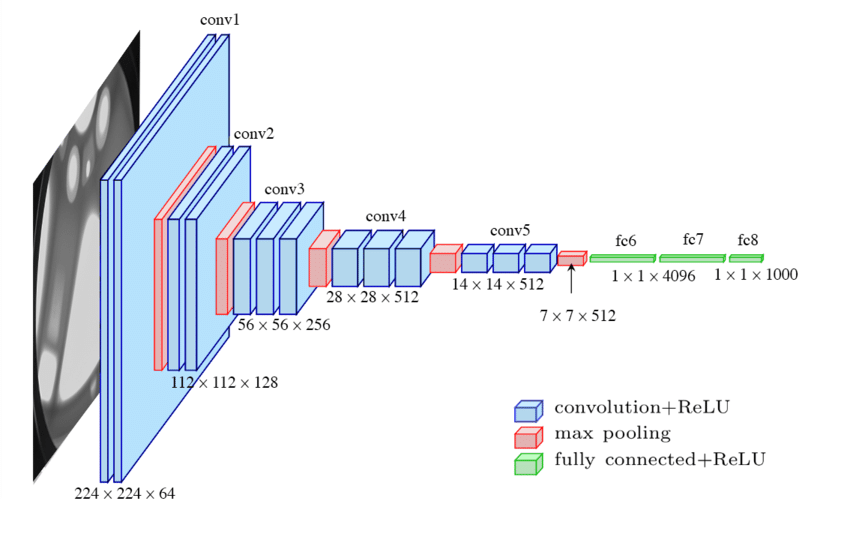

In [111]:
from IPython.display import Image
Image('VGG-16.png',width=800)

In [88]:
# Here we will be using imagenet weights
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(input_shape=Image_size + [3], weights='imagenet', include_top=False)
vgg16.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_6')>

In [89]:
# don't train existing weights
for layer in vgg16.layers:
  layer.trainable = False

In [90]:
#flatten the output of inception model
x_vgg16= Flatten()(vgg16.output)

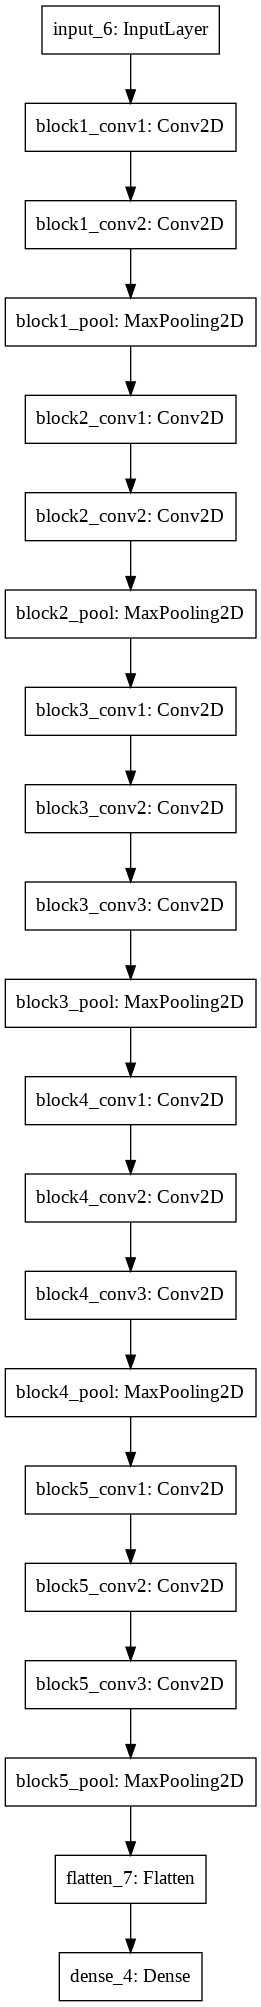

In [91]:
prediction = Dense(len(folders), activation='softmax')(x_vgg16)
#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)
plot_model(model)

### **Try with Adam Optimizer**

In [76]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Try with different Optimizer and Data Augmentation   

In [77]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [78]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [79]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton desise classification/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1822 images belonging to 4 classes.


In [80]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton desise classification/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 122 images belonging to 4 classes.


In [81]:
history= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
114/114 [==============================] - 34s 290ms/step - loss: 0.7434 - accuracy: 0.7138 - val_loss: 0.5946 - val_accuracy: 0.7541
Epoch 2/15
114/114 [==============================] - 32s 282ms/step - loss: 0.2002 - accuracy: 0.9235 - val_loss: 0.5554 - val_accuracy: 0.8033
Epoch 3/15
114/114 [==============================] - 32s 281ms/step - loss: 0.2505 - accuracy: 0.8985 - val_loss: 0.4819 - val_accuracy: 0.8443
Epoch 4/15
114/114 [==============================] - 32s 281ms/step - loss: 0.1046 - accuracy: 0.9600 - val_loss: 0.5694 - val_accuracy: 0.7951
Epoch 5/15
114/114 [==============================] - 32s 281ms/step - loss: 0.1177 - accuracy: 0.9559 - val_loss: 0.3958 - val_accuracy: 0.8443
Epoch 6/15
114/114 [==============================] - 32s 280ms/step - loss: 0.0615 - accuracy: 0.9821 - val_loss: 0.5917 - val_accuracy: 0.7459
Epoch 7/15
114/114 [==============================] - 32s 279ms/step - loss: 0.0748 - accuracy: 0.9701 - val_loss: 0.5036 - val_ac

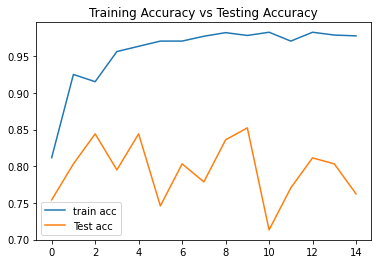

<Figure size 432x288 with 0 Axes>

In [82]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='Test acc')
plt.title("Training Accuracy vs Testing Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title("Train Loss vs Testing Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#### By visualizing, accuracy and loss of train and test data we can see VGG has maxiumum tesing accuracy as 84 as well as train accuracy as 98%. It seems like overfiting So, we have to use different data Arugment and optimizer.

### **Try VGG16 with SGD optimizer and Momentum**

In [92]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [93]:
history= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/15
114/114 [==============================] - 34s 290ms/step - loss: 0.8150 - accuracy: 0.5349 - val_loss: 1.0972 - val_accuracy: 0.6475
Epoch 2/15
114/114 [==============================] - 32s 279ms/step - loss: 0.3928 - accuracy: 0.8227 - val_loss: 0.2498 - val_accuracy: 0.8443
Epoch 3/15
114/114 [==============================] - 32s 278ms/step - loss: 0.4099 - accuracy: 0.8330 - val_loss: 0.4780 - val_accuracy: 0.7787
Epoch 4/15
114/114 [==============================] - 32s 279ms/step - loss: 0.1827 - accuracy: 0.9097 - val_loss: 0.5110 - val_accuracy: 0.8033
Epoch 5/15
114/114 [==============================] - 32s 278ms/step - loss: 0.1690 - accuracy: 0.9138 - val_loss: 0.2857 - val_accuracy: 0.8197
Epoch 6/15
114/114 [==============================] - 32s 278ms/step - loss: 0.1357 - accuracy: 0.9243 - val_loss: 0.3773 - val_accuracy: 0.7951
Epoch 7/15
114/114 [==============================] - 32s 278ms/step - loss: 0.1611 - accuracy: 0.9229 - val_loss: 0.3306 - val_ac

### **Train vs Losses Accuracy**

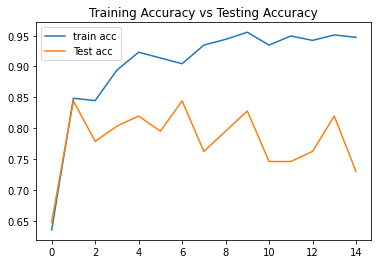

<Figure size 432x288 with 0 Axes>

In [94]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='Test acc')
plt.title("Training Accuracy vs Testing Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Train vs Losses Errors

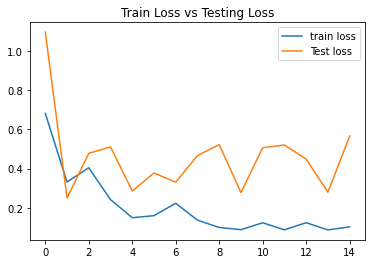

<Figure size 432x288 with 0 Axes>

In [95]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title("Train Loss vs Testing Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

After applying VGG-16 with SGD optimizer, It gave same accuracy as VGG-16 with adam optimizer but VGG-16 SGD optimizer seems to avoid over fitting.

### **Conclussion**

#### Finally, We can say Inception V3 has better performance in terms of accuracy than VGG-16